<a href="https://colab.research.google.com/github/landge/pytorch_mri/blob/master/live_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os, sys
from google.colab import drive
from pathlib import Path
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [18]:
!pip install nilearn

In [0]:
import nibabel as nib
from nilearn.plotting import plot_anat
import matplotlib.pyplot as plt
import imageio
%matplotlib inline
from IPython.display import display

## Milestone 1

In [0]:
root_dir = '/content/gdrive/My Drive/live_project/data/small'

In [0]:
p = Path(root_dir)
t1 = p/'t1'
t2 = p/'t2'

In [0]:
t1_paths = [f for f in t1.glob('*')]
t2_paths = [f for f in t2.glob('*')]

In [0]:
t1_subjects = [x.name[:6] for x in t1_paths]
t2_subjects = [x.name[:6] for x in t2_paths]
assert t1_subjects.sort() == t2_paths.sort()
subs = t1_subjects

In [0]:
t1_and_t2_dict = {sub[0]: {'t1':sub[1], 't2':sub[2]} for sub in zip(subs, t1_paths, t2_paths)}

(120, 120, 90)


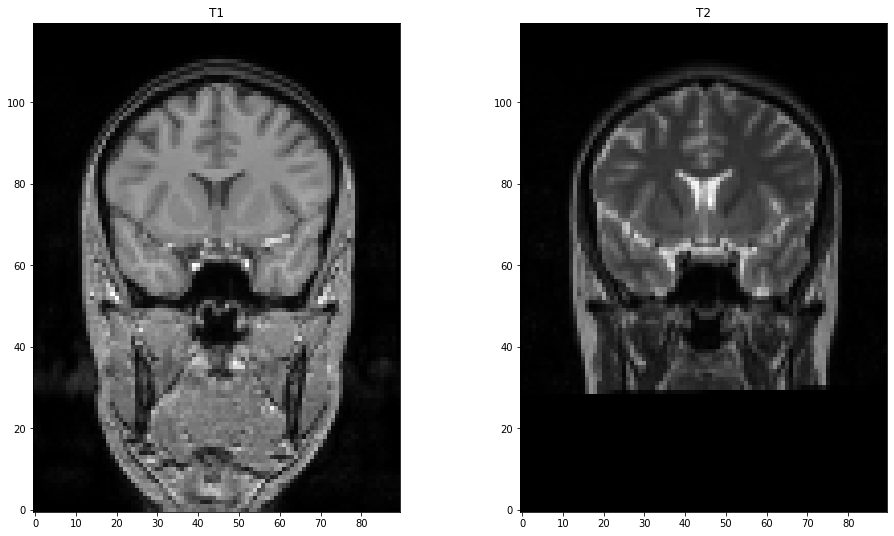

(120, 120, 90)


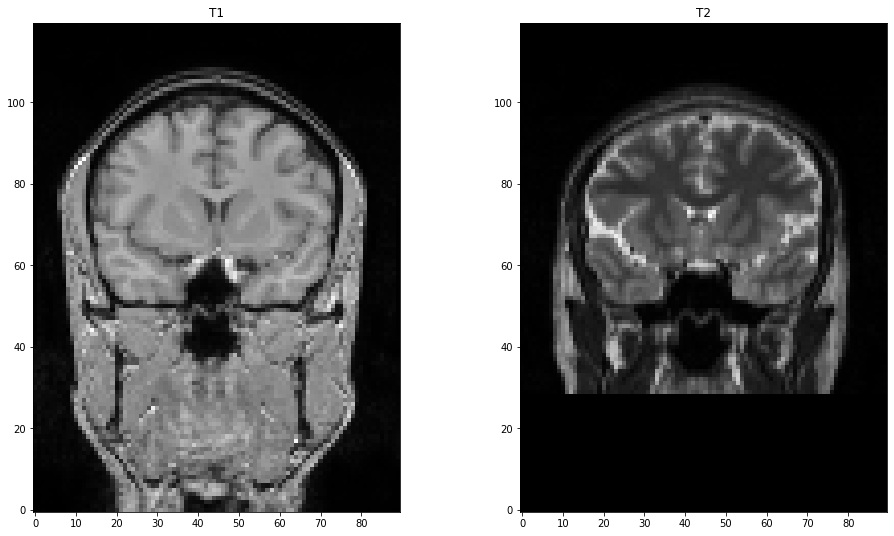

In [25]:
for sub in subs[:2]:

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,9))

  t1 = nib.load(t1_and_t2_dict[sub]['t1']).get_fdata()
  t2 = nib.load(t1_and_t2_dict[sub]['t2']).get_fdata()
  ax[0].imshow(t1[50,:,:], cmap='gray', origin='lower')
  print(t1.shape)
  ax[0].set_title('T1')
  ax[1].imshow(t2[50,:,:], cmap='gray', origin='lower')
  ax[1].set_title('T2')

  plt.show()
  

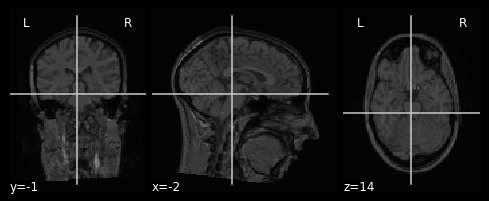

In [26]:
plot_anat(t1_and_t2_dict[subs[0]]['t1'].as_posix())